 # 回帰1:映画の興行収入の予測

In [93]:
import unittest
import doctest
import os
from domain import CSVRepository, SQLRepository, CategoricalData, DataVisualization, convert_categoricals

path = os.path.dirname(os.path.abspath(__file__))
#repo = SQLRepository(table='Cinema')
repo = CSVRepository(file= path + '/data/cinema.csv')

 ## データの内容
 | 列名 | 内容 |
 | --- | --- |
 | cinema_id | 映画作品のID |
 | SNS1 | 公開後10日以内にSNS1でつぶやかれた数 |
 | SNS2 | 公開後10日以内にSNS2でつぶやかれた数 |
 | actor | 主演俳優の昨年のメディア露出度。actorの値が大きいほど露出している |
 | original | 原作があるかどうか（あるなら1,ないなら0） |
 | sales | 最終的な興行収入（単位:万円） |

In [94]:
df = repo.get_data()
df.head(3)

,cinema_id,SNS1,SNS2,actor,original,sales
0,1375,291.0,1044,8808.994029,0,9731
1,1000,363.0,568,10290.709370,1,10210
2,1390,158.0,431,6340.388534,1,8227


 ## 問題背景

 ## データ分析の方法検討
 - 特徴量を「公開後10日以内にSNS1でつぶやかれた数、公開後10日以内にSNS2でつぶやかれた数、主演俳優の昨年のメディア露出度、原作があるかどうか」、目的変数を「最終的な興行収入」として、映画の興行収入を予測する。

 # 分析の実施

 ### データの概要

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cinema_id  100 non-null    int64  
 1   SNS1       99 non-null     float64
 2   SNS2       100 non-null    int64  
 3   actor      99 non-null     float64
 4   original   100 non-null    int64  
 5   sales      100 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 4.8 KB


 ### データの統計量

In [96]:
df.describe()

,cinema_id,SNS1,SNS2,actor,original,sales
count,100.000000,99.000000,100.000000,99.000000,100.000000,100.0000
mean,1465.310000,370.737374,658.510000,9817.539306,0.500000,9882.4300
std,297.894826,211.925795,323.839232,1446.802508,0.502519,799.2267
min,1000.000000,0.000000,0.000000,5702.796056,0.000000,7869.0000
25%,1212.750000,194.500000,443.250000,8819.109486,0.000000,9314.5000
50%,1455.000000,350.000000,654.000000,9991.717888,0.500000,9965.0000
75%,1739.250000,513.500000,885.750000,10796.866185,1.000000,10440.2500
max,1989.000000,1000.000000,1500.000000,12665.073780,1.000000,11405.0000


 ### データの特徴量の相関確認

In [97]:
categorical_cols = ['sales']
df_conv = convert_categoricals(df, categorical_cols)
df_conv.corr()

,cinema_id,SNS1,SNS2,actor,original,sales
cinema_id,1.000000,-0.132512,-0.107442,-0.088354,-0.068050,-0.072153
SNS1,-0.132512,1.000000,0.291303,0.449249,0.209370,0.657756
SNS2,-0.107442,0.291303,1.000000,0.391254,0.075136,0.470141
actor,-0.088354,0.449249,0.391254,1.000000,0.280555,0.756298
original,-0.068050,0.209370,0.075136,0.280555,1.000000,0.431011
sales,-0.072153,0.657756,0.470141,0.756298,0.431011,1.000000


 ### データの数値変数確認

In [98]:
df.select_dtypes(include='number').columns

Index(['cinema_id', 'SNS1', 'SNS2', 'actor', 'original', 'sales'], dtype='object')

 ### originalカテゴリ

In [99]:
original = CategoricalData(df, 'original')

In [100]:
original.show()

0    50
1    50
Name: original, dtype: int64

<Axes: >

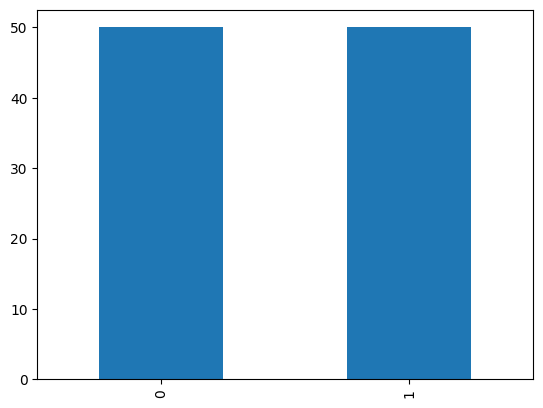

In [101]:
original.plot()

## %% [markdown]
# ### 種類カテゴリの数値変換

<Axes: >

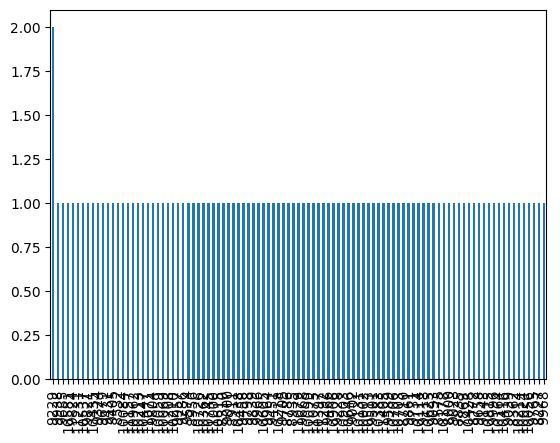

In [102]:
categorical_cols = ['original']
df_conv = convert_categoricals(df, categorical_cols)
conv_species = CategoricalData(df_conv, 'sales')
conv_species.plot()

 ### ピボットテーブルによる集計

In [103]:
original.pivot('sales', 'SNS1')

original,0,1
sales,,
7869,NaN,1.0
8000,1.0,NaN
8227,NaN,1.0
8310,1.0,NaN
8362,1.0,NaN
...,...,...
11157,NaN,1.0
11208,NaN,1.0
11231,NaN,1.0


In [104]:
original.pivot('sales', 'SNS2')

original,0,1
sales,,
7869,NaN,1.0
8000,1.0,NaN
8227,NaN,1.0
8310,1.0,NaN
8362,1.0,NaN
...,...,...
11157,NaN,1.0
11208,NaN,1.0
11231,NaN,1.0


In [105]:
original.pivot('sales', 'actor')

original,0,1
sales,,
7869,NaN,1.0
8000,1.0,NaN
8227,NaN,1.0
8310,1.0,NaN
8362,1.0,NaN
...,...,...
11157,NaN,1.0
11208,NaN,1.0
11231,NaN,1.0


 ### ダミー変数化

In [106]:
df_dummy = original.dummy()
df_dummy

,cinema_id,SNS1,SNS2,actor,sales,original_0,original_1
0,1375,291.0,1044,8808.994029,9731,1,0
1,1000,363.0,568,10290.709370,10210,0,1
2,1390,158.0,431,6340.388534,8227,0,1
3,1499,261.0,578,8250.485081,9658,1,0
4,1164,209.0,683,10908.539550,9286,1,0
...,...,...,...,...,...,...,...
95,1260,494.0,1050,11137.482810,10537,0,1
96,1283,505.0,928,11376.038540,10084,0,1
97,1861,368.0,966,10393.252480,10069,1,0
98,1006,326.0,1068,9454.019853,10218,0,1


 ### データのカテゴリ変数確認

In [107]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

 ### データの可視化

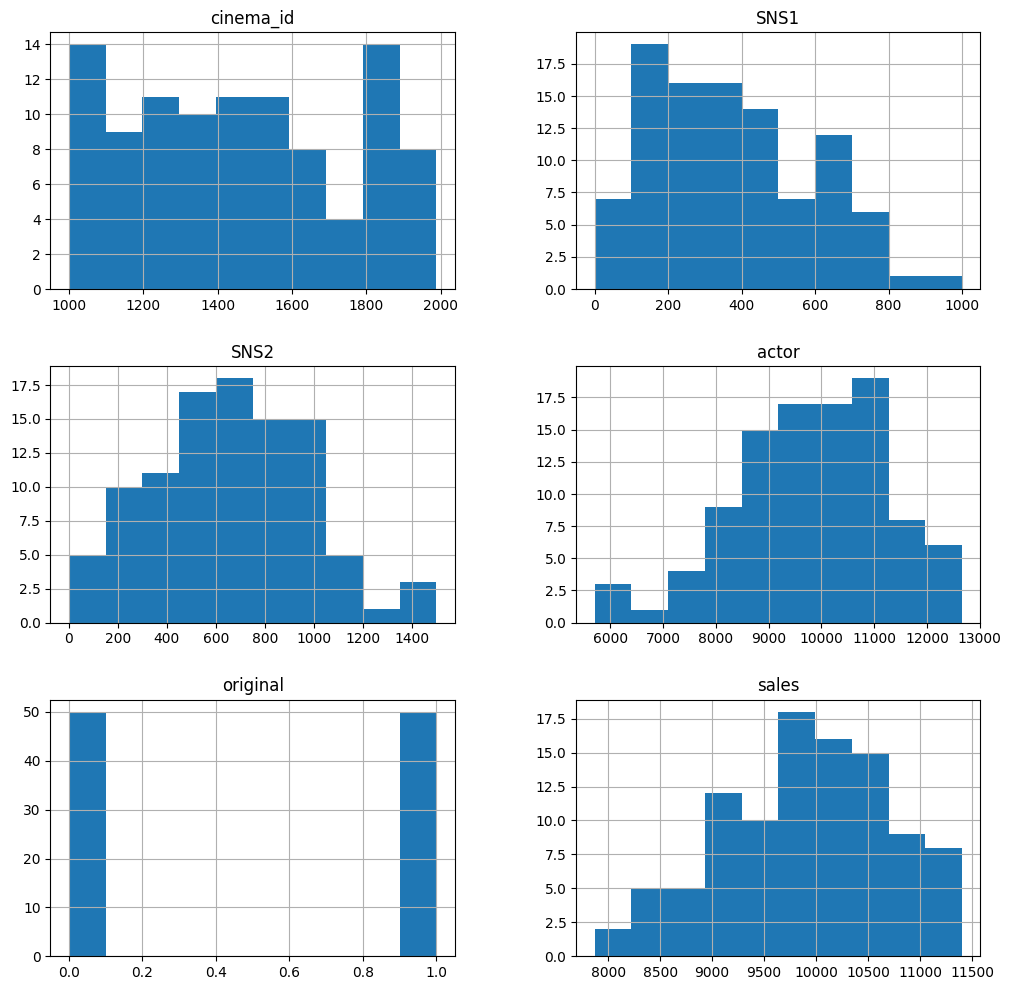

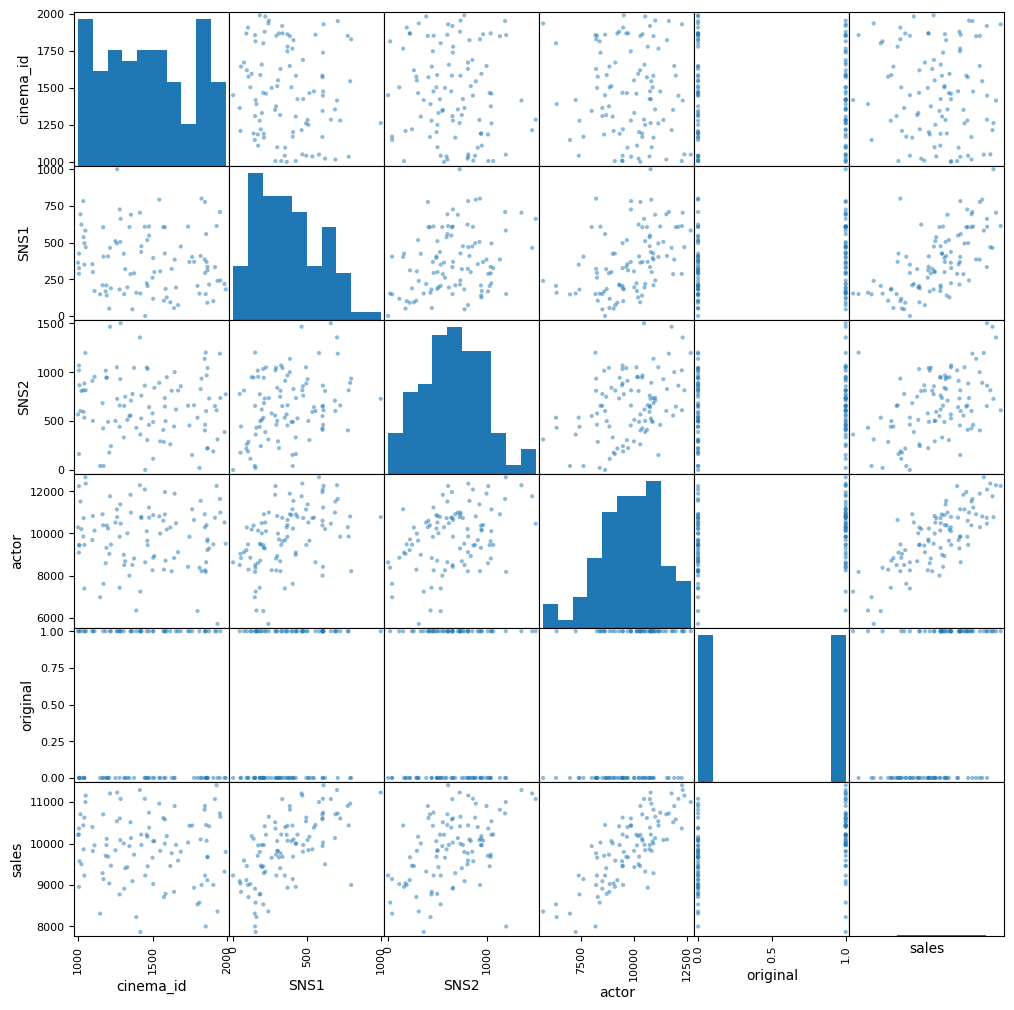

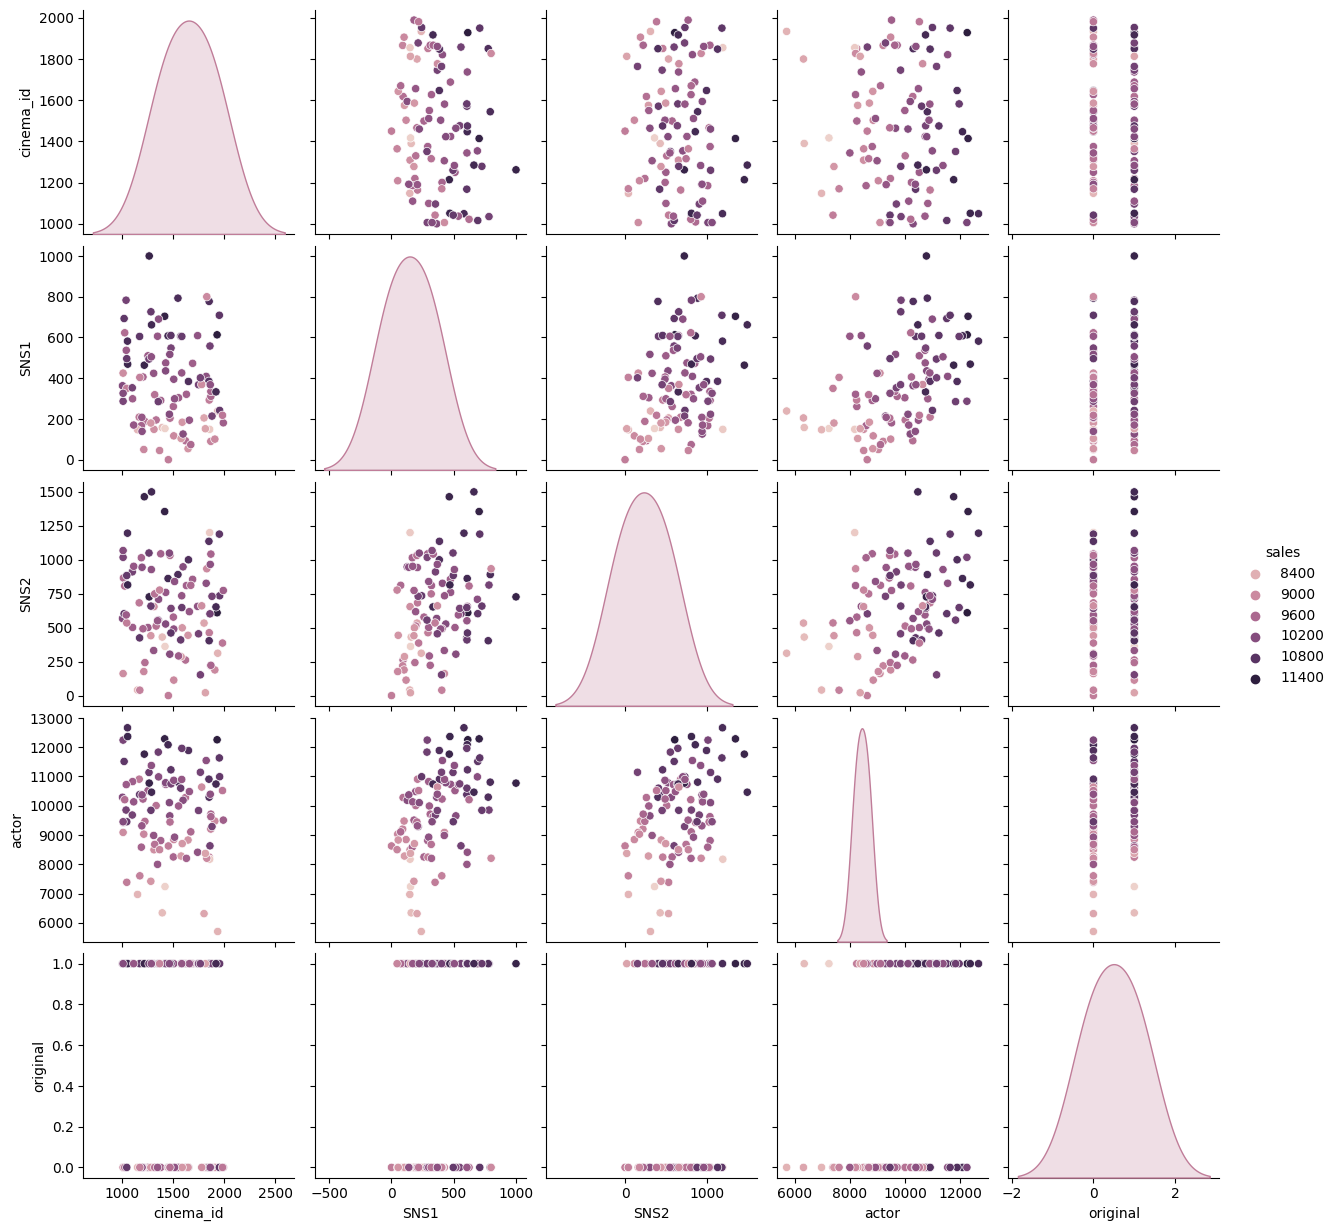

In [108]:
dv = DataVisualization(df)
dv.df_all('sales')

 ## データの前処理

 ### 欠損地処理（行削除・全体代表値埋め、グループ代表値埋め）

 ### 各手法を必要に応じて実施

 - 外れ値の除外
 - 多項式特徴量・交互作用特徴量の追加
 - 特徴量の絞り込み
 - 標準化

 ## モデルの作成と学習

 ### 未学習状態モデルの生成（分類なら決定木、回帰なら線形回帰）

 ### 訓練データで学習（必要に応じて不均衡データ補正）

 ## モデルの評価

 ### 検証データで評価し指標確認（分類なら正解率、回帰なら決定係数）

 ### NG:改善案検討前処理に戻る
 ### OK:最終性能評価（テストデータで評価）

In [109]:
doctest.testmod(verbose=True)
unittest.main(argv=[''], verbosity=2, exit=False)

3 items had no tests:
    __main__
    __main__.__VSCODE_compute_hash
    __main__.__VSCODE_wrap_run_cell
0 tests in 3 items.
0 passed and 0 failed.
Test passed.



----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK
